# Bitcoin Price Prediction
using time series analysis


### Result so far
- 2013년~2020년 전체에 대한 공통의 추세와 계절성은 존재하지 않는다.

### 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [75]:
df = pd.read_csv('./data/bitcoin_eda.csv', index_col=0)
df.head()

,date,close,volume,fluctuation,weighted_close,close_log,close_norm,volume_norm,weighted_close_norm
0,2013-01-01,13.3,28410.0,-1.55,377853.0,2.587764,0.000000,0.028034,0.000000e+00
1,2013-01-02,13.3,17970.0,0.00,239001.0,2.587764,0.000000,0.017585,0.000000e+00
2,2013-01-03,13.4,18030.0,0.90,241602.0,2.595255,0.000002,0.017645,3.073006e-08
3,2013-01-04,13.5,29640.0,0.75,400140.0,2.602690,0.000003,0.029265,1.019338e-07
4,2013-01-05,13.4,21330.0,-0.44,285822.0,2.595255,0.000002,0.020948,3.648214e-08


In [94]:
df['close']

date
2013-01-01       13.3
2013-01-02       13.3
2013-01-03       13.4
2013-01-04       13.5
2013-01-05       13.4
               ...   
2021-02-24    49697.5
2021-02-25    46928.5
2021-02-26    46345.6
2021-02-27    46136.7
2021-02-28    45164.0
Name: close, Length: 2981, dtype: float64

In [ ]:
df_dateindex = df[['date', 'close']]
df_dateindex.index = df['date']
df_dateindex.

In [3]:
# 2013.01.01 - 2020.12.31
# df = df.iloc[:2922, :]

<AxesSubplot:>

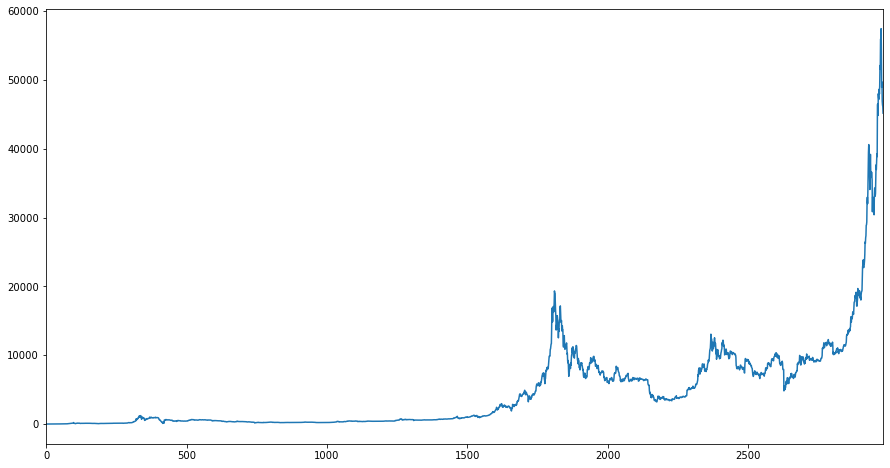

In [81]:
df['close'].plot(figsize=(15,8))

![](https://hitenism.com/wp-content/uploads/Hype-Cycle-General.png)

# ARIMA for python
baseline
- https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

In [4]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['close'])

ADF Test Statistic : 1.6637763444682345
p-value : 0.9980368382892263
#Lags Used : 28
Number of Observations : 2893
weak evidence against null hypothesis,indicating it is non-stationary 


<AxesSubplot:>

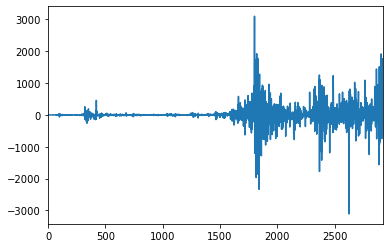

In [5]:
(df['close'] - df['close'].shift(1)).plot()

<AxesSubplot:>

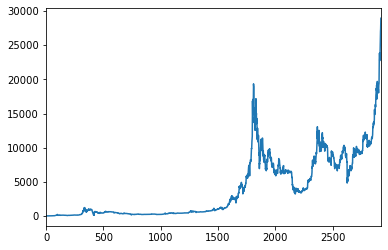

In [6]:
df.close.plot()

<AxesSubplot:>

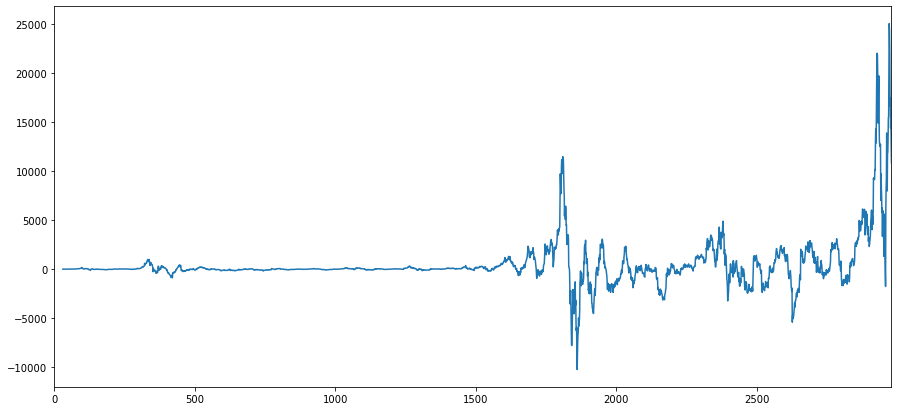

In [86]:
plt.figure(figsize=(15, 7))
(df['close']-df['close'].shift(30)).plot()

<AxesSubplot:>

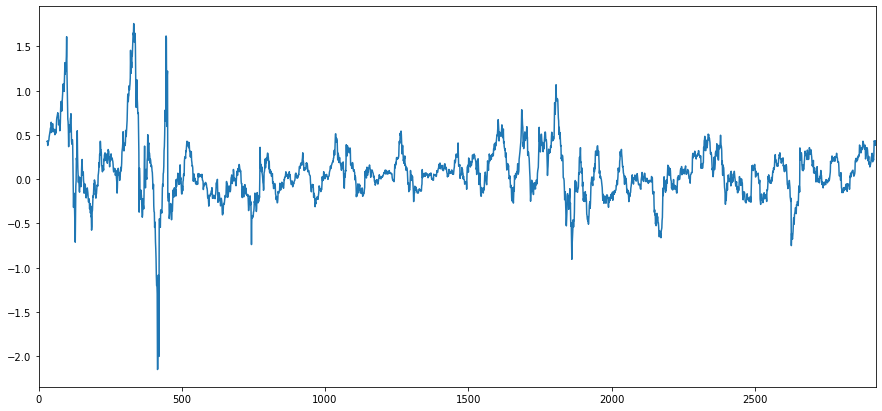

In [43]:
plt.figure(figsize=(15, 7))
((np.log(df['close'])-np.log(df['close'].shift(30)))).plot()

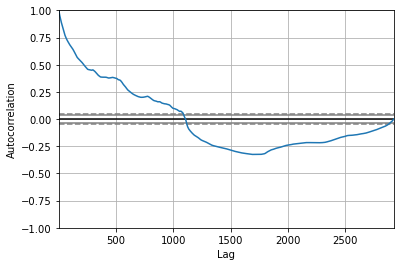

In [80]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['close'])
plt.show()

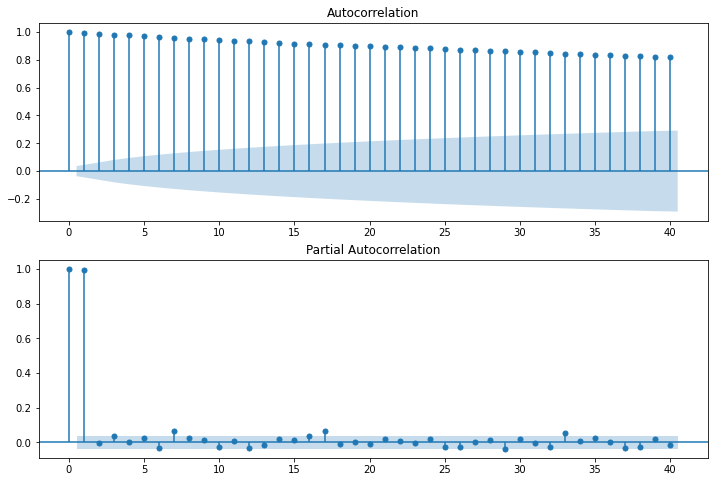

In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['close'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['close'].dropna(),lags=40,ax=ax2)

In [ ]:
import statsmodels.api as sm

In [91]:
model=sm.tsa.statespace.SARIMAX(df['close'],order=(0, 1, 1))
results=model.fit()
results.summary()

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 2981
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -22094.702
Date:                Wed, 03 Mar 2021   AIC                          44193.403
Time:                        18:09:03   BIC                          44205.403
Sample:                    01-01-2013   HQIC                         44197.721
                         - 02-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0288      0.005      5.512      0.000       0.019       0.039
sigma2      1.615e+05    670.462    240.867      0.000     1.6e+05    1.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            728823.51
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             373.77   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        79.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
model_seasonal=sm.tsa.statespace.SARIMAX(df['close'],order=(0, 1, 1), seasonal_order=(0,1,1,30))
results2=model_seasonal.fit()

In [58]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              close   No. Observations:                 2922
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood              -20330.219
Date:                            Wed, 03 Mar 2021   AIC                          40666.439
Time:                                    17:11:01   BIC                          40684.347
Sample:                                         0   HQIC                         40672.892
                                           - 2922                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0140      0.007      2.034      0.042       0.001       0.027
ma.S.L30      -0.9995      0.195     -5.126      0.000      -1.382      -0.617
sigma2      7.174e+04   1.37e+04      5.254      0.000     4.5e+04    9.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             83919.38
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             110.23   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

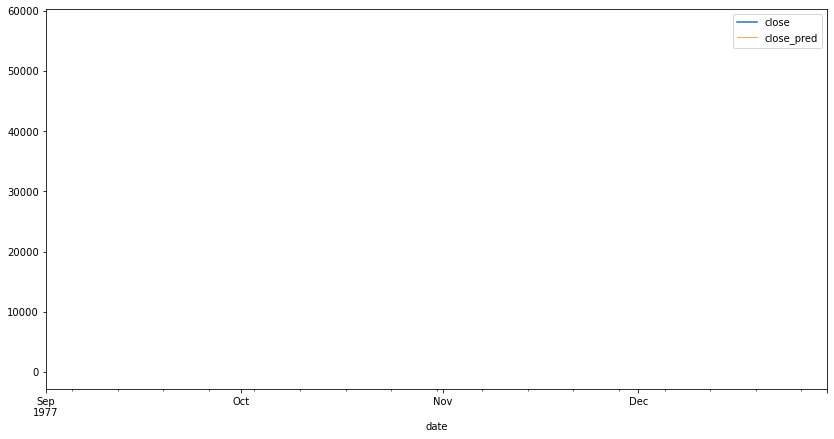

In [92]:
plt.figure(figsize=(14, 7))
df['close'].plot()
results.predict().plot(lw=0.7)
plt.xlim(2800, 2920)
plt.legend(['close', 'close_pred'])
plt.show()

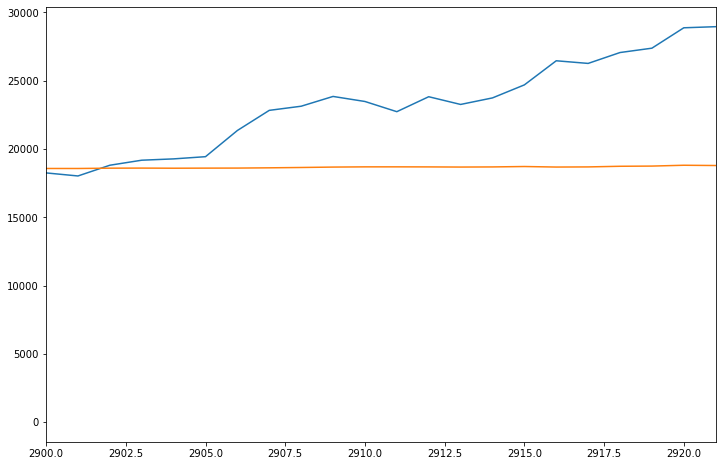

In [47]:
forecast = results.predict(start=2900,end=len(df)-1,dynamic=True)
plt.figure(figsize=(12, 8))
df['close'].plot()
forecast.plot()
plt.xlim(2900, len(df)-1)
plt.show()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

# 추세, 시계열성, 잡음

https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

In [89]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

df.index = pd.to_datetime(df['date'])
result = seasonal_decompose(df['close'], model='multiplicative')
# fig = result.plot()
# plot_mpl(fig)
result

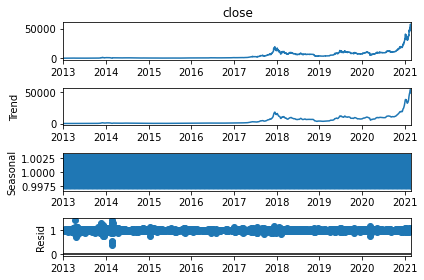

In [90]:
result.plot()
plt.show()

## ACF/PACF for Bitcoin Close Price 
ARIMA의 모수는 크게 3가지가 있다. AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d 가 그것이다. 보통은 p, d, q의 순서로 쓴다. 통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용한다.
- 여기서 p * q = 0 이라 하면, 두 값중 하나는 0이라는 이야기이다.
- ARIMA는 AR모형과 MA모형을 하나로 합쳤다면서 둘 중 하나의 모수가 0인건 또 무슨소리? 라고 할지 모르겠지만, 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 이렇게 사용하는것이 더 잘 맞는다고 한다.
    - from https://byeongkijeong.github.io/ARIMA-with-Python/

<br>

### ACF
- 안정적으로 감소

<br>

### PACF
- time lag=1 이후 급감
    
> 비트코인 종가는 MA보다 AR의 성향을 강력하게 나타내고 있음
    
> (p,q) = (0, 1)



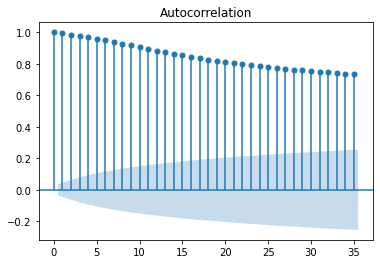

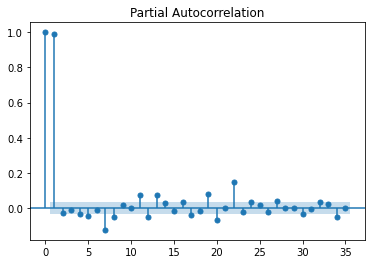

In [45]:
plot_acf(df['close'])
plot_pacf(df['close'])
plt.show()

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


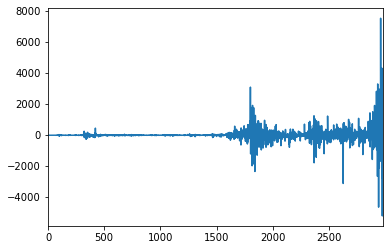

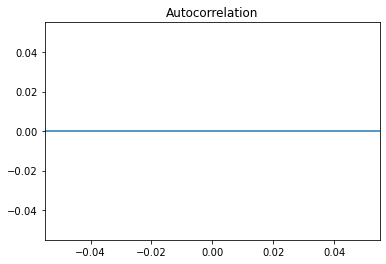

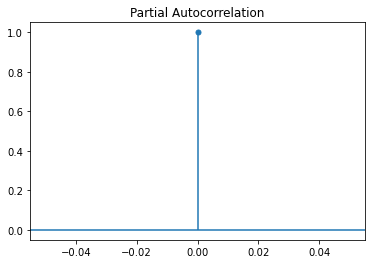

In [46]:
# 적절한 차분 차수의 계산을 위해 우선 1차 차분을 하고, ACF 및 PACF를 다시 계산
# 정상 시계열 상태로 확인
close_diff1 = df['close'].diff(periods=1)

close_diff1.plot()
plot_acf(close_diff1)
plot_pacf(close_diff1)
plt.show()

In [65]:
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['close'], order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2981
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -22094.702
Date:                Wed, 03 Mar 2021   AIC                          44193.403
Time:                        16:33:01   BIC                          44205.403
Sample:                             0   HQIC                         44197.721
                               - 2981                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0288      0.005      5.512      0.000       0.019       0.039
sigma2      1.615e+05    670.462    240.867      0.000     1.6e+05    1.63e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

(2800.0, 2980.0)

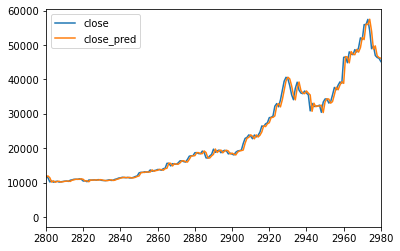

In [67]:
df['close'].plot()
model_fit.predict(df.index[0], df.index[-1]).plot()
plt.legend(['close', 'close_pred'])
plt.xlim(2800)

In [68]:
model_fit.forecast(steps=7)

2981    45136.11151
2982    45136.11151
2983    45136.11151
2984    45136.11151
2985    45136.11151
2986    45136.11151
2987    45136.11151
Name: predicted_mean, dtype: float64

# pmdarima

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

# Load/split your data
y = pm.datasets.load_sunspots()
train, test = train_test_split(y, train_size=2700)

# Define and fit your pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

# Serialize your model just like you would in scikit:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

# Load it and make predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    print(mod.predict(15))
# [25.20580375 25.05573898 24.4263037  23.56766793 22.67463049 21.82231043
# 21.04061069 20.33693017 19.70906027 19.1509862  18.6555793  18.21577243
# 17.8250318  17.47750614 17.16803394]